In [479]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [480]:
pattern_size = (6, 9)
image_size = (480, 640)
border_width = 40
square_size = 55

pattern_image = np.ones(image_size, np.uint8)
pattern_corners = np.zeros(((pattern_size[0]) * (pattern_size[1]), 2), np.float32)
n = 0
for i in range(pattern_size[0] + 1):
    for j in range(pattern_size[1] + 1):
        j0 = border_width + j * square_size
        i0 = border_width + i * square_size

        if (i + j) % 2 == 0:
            pattern_image[i0:i0+square_size, j0:j0+square_size] = 0

        if 0 < i <= pattern_size[0] and 0 < j <= pattern_size[1]:
            pattern_corners[n, 0] = j0
            pattern_corners[n, 1] = i0
            n += 1


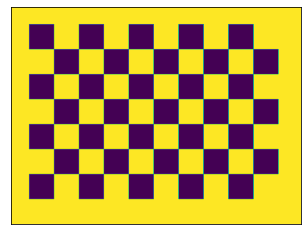

In [481]:
# pattern_image = cv.imread('pattern.png', 0)
plt.imshow(pattern_image)
plt.xticks([]), plt.yticks([])
plt.show()


In [482]:
status, corners = cv.findChessboardCorners(pattern_image, (9, 6))
if status:
    #print(corners)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_COUNT, 300, 0.01)
    cv.cornerSubPix(pattern_image, corners, (5, 5), (-1, -1), criteria)
else:
    print("Could not detect corners")

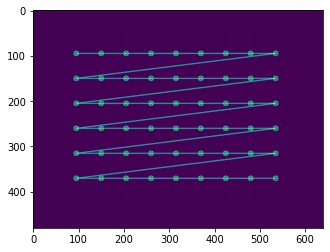

In [483]:
cv.drawChessboardCorners(pattern_image, (9, 6), pattern_corners, status)
plt.imshow(pattern_image)
plt.show()

In [484]:
corners = corners.reshape(-1, 2)
print(corners.shape)
print(pattern_corners.shape)

diff = corners - pattern_corners
print(diff)


(54, 2)
(54, 2)
[[-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]
 [-0.5 -0.5]]


In [485]:
#sns.displot(errors)
errors = np.linalg.norm(diff, axis=1)
print(errors)

[0.70710677 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677
 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677
 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677
 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677
 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677
 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677
 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677
 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677
 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677 0.70710677]
